# CoffeeFinder

#### Melody Chiu and Simrun Mutha

In [1]:
%load_ext autoreload
%autoreload 2

Importing all the neccessary libraries

In [2]:
import os
import pandas as pd
import nltk
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy

Importing the neccessary functions

In [3]:
import scraping_reviews
import processing_data
import loading
import test
import visualizing_data

## Introduction

The goal of CoffeeFinder is to find what makes each coffee brand unique in terms of flavor. As novice coffee drinkers, we found it difficult to purchase a specific type of coffee because it was difficult to figure out what flavors stand out in different coffee brands just based on the description given on the product. By finding out what flavors make each coffee brand unique compared to other coffee brands, we can help ourselves and other novice coffee drinkers identify which coffee would be the right fit for them. 

In order to answer this question, we scraped Amazon reviews of 8 dark roast coffees and found all the adjectives present in those reviews. We filtered those adjectives further, to find the ones related to flavor. We then found which adjectives are commonly used across all the brands to describe the coffees. We removed these commonly used adjectives to find the adjectives that are  unique to one particular coffee in order to find what makes each coffee special. 

## Methodology

### Web Scraping

In order to get data on how people describe coffee flavors, we looked through the Amazon reviews for different coffee brands. Because Amazon doesn’t provide an API that grants access to all reviews, we programmatically scraped the webpages using the Requests and BeautifulSoup libraries. After getting the raw content of the web page with Requests, using the BeautifulSoup library allowed us to understand the HTML structure of the page and target specific pieces of information. With this method, we could get all the reviews on a page and also access the total number of reviews that the product has. The following two code cells will load the brand and brand name info and scrape all the data for the coffee brands we decided to look into. We recommend not running the second cell because it will take a very long time. The data has already been loaded into .csv files.




In [4]:
brand_names,brand_urls = loading.load_brands_info()

In [ ]:
#for i in range(len(brand_names)):
#     df = scraping_reviews.get_all_reviews_for_one(brand_urls[i])
#     df.to_csv(f'{brand_names[i]}')

We stored the data in a dataframe using the Pandas library so that we could store the reviews for each brand in .csv files named as the respective brands. The reason we did this is because Amazon has a tough defense against automated access to their data. Although we wrote a function to repeatedly request the contents of a url until we get useful data, it frequently times out before returning any usable information. As we ran requests, it took exponentially longer to bypass the Amazon machine detection. In order to work with this difficulty, we stored the data in .csv files so that we wouldn’t have to scrape web pages every time we wanted to test our code. A perk of handling our data this way is that it allows us to view the data in an organized dataframe using Pandas as shown below:

In [5]:
df = pd.read_csv('Peets')
df[:11]

,Unnamed: 0,Review_text
0,0,Peet’s is good coffee when fresh but the pack ...
1,1,Ridiculously short “best by date.” Received pa...
2,2,"The coffee is good; however, I get 5 - 20 oz. ..."
3,3,Here's what you should know about me: I'm a ha...
4,4,"This is a good, strong coffee. It's not the or..."
5,5,"After all these years, still the best coffee y..."
6,6,I drink a lot of coffee! My preference has al...
7,7,I thought among the more experienced connoisse...
8,8,"Received the coffee 8 months past the ""freshes..."
9,9,Ordered the coffee on prime day 7/17/18 and re...


### Data Processing


At this point, we had all the reviews for each coffee brand stored in their respective .csv files, easily accessible to us. Going back to the goal of our project, which is to find unique descriptors of different coffee brands, the next step was to identify and isolate these descriptive words within the reviews. We did this using the Natural Toolkit library, which enabled us to classify and tag each of the words with their parts of speech. This means we could find which words in the reviews were tagged as an adjective.

The next step, after adjective identification, was adjective filtration. To filter for adjectives that provide useful information for our project goal, we passed them through three conditions:

1. The adjective shouldn’t be used in a sentence describing something non-flavor-related:

    When an adjective is identified, the sentence in which it appears should be scanned for all the nouns that appear in it. If it contains any nouns that appear in a predefined list of non-flavor-related nouns, then the adjective should be disregarded. These nouns include things that appear in Amazon reviews often that have nothing to do with the flavor of coffee, such as shipping, packaging, and expiry. With this condition, we make the assumption that all adjectives that are not related to these nouns are related to flavor.
    

2. The adjective should be at least 3 or more characters:

    When the reviews are tokenized and tagged through NLTK (i.e. separated into a list of words), a large number of the words that passed through were single or double characters which aren’t actually adjectives.
    

3. The adjective frequency has to pass the defined threshold percentage:

    If an adjective’s frequency is too small, which we are assuming means it is not a descriptor shared by lots of reviewers, this adjective should be removed. We only want to keep adjectives that are highly used and are representative of what the coffee actually tastes like.

The following code cell will return all the adjectives related to flavor for each coffee brand:


In [6]:
nouns_to_disregard = loading.load_nouns_to_disregard()
brand_names,brand_urls = loading.load_brands_info()
all_data = processing_data.all_the_data(brand_names,nouns_to_disregard)
# all_data

Following this filtering process, was the identification of common words shared between these adjectives. At this point, the data was stored in a mega-dictionary (dictionary within a dictionary) with each brand as a key mapping to a dictionary. This inside dictionary contained all of the flavor-related adjectives found in the brand’s reviews mapping to their frequency. Common words were identified by going through this mega-dictionary and checking which words were highly shared across brands. The following cell will create a list of common words from the dictionary of adjectives above. The argument, 6, that is passed in represents how many coffee brands have to contain that word in it for it to be considered a common word.

In [7]:
common_words = processing_data.identify_common_adjs(all_data, 6,brand_names)
common_words

['good', 'favorite', 'dark', 'other', 'strong', 'great', 'rich']

Finally, with this list of common words, the last step was to find which adjectives were unique to each brand of coffee. To do this, we went through the mega-dictionary of all adjectives for each brand, found the adjectives of each brand and removed any word that was in the list of common words. This resulted in a dictionary with the different coffee brands as keys mapping to their unique adjectives. This dictionary is created by the following cell.

In [8]:
unique_words = processing_data.find_unique_words(all_data, common_words,brand_names)
# unique_words

## Results

Once we found the common adjectives that were used across all the coffee brands to describe the coffee flavor, we had to display this information. We decided to use word clouds because we can clearly represent multiple words and their frequency based on the size of the word.

Text(0.5, 1.0, 'Common Words')

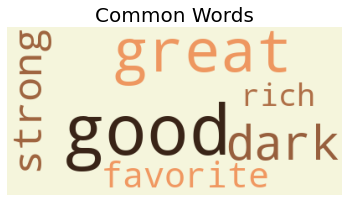

In [9]:
#displaying common words
words_with_count = visualizing_data.words_with_count(common_words, all_data, brand_names)
string_of_common_words = visualizing_data.string_for_wordle(words_with_count)
cloud = visualizing_data.create_word_cloud(string_of_common_words, brand = 'Common Words')
plt.imshow(cloud)
plt.axis('off')
plt.title('Common Words', size= 20)

By removing these common adjectives that many coffee brands share, we were able to identify a list of unique words for each brand of coffee along with how many times each unique word showed up in the reviews. Belows are the unique words used to describe coffee from these different brands:

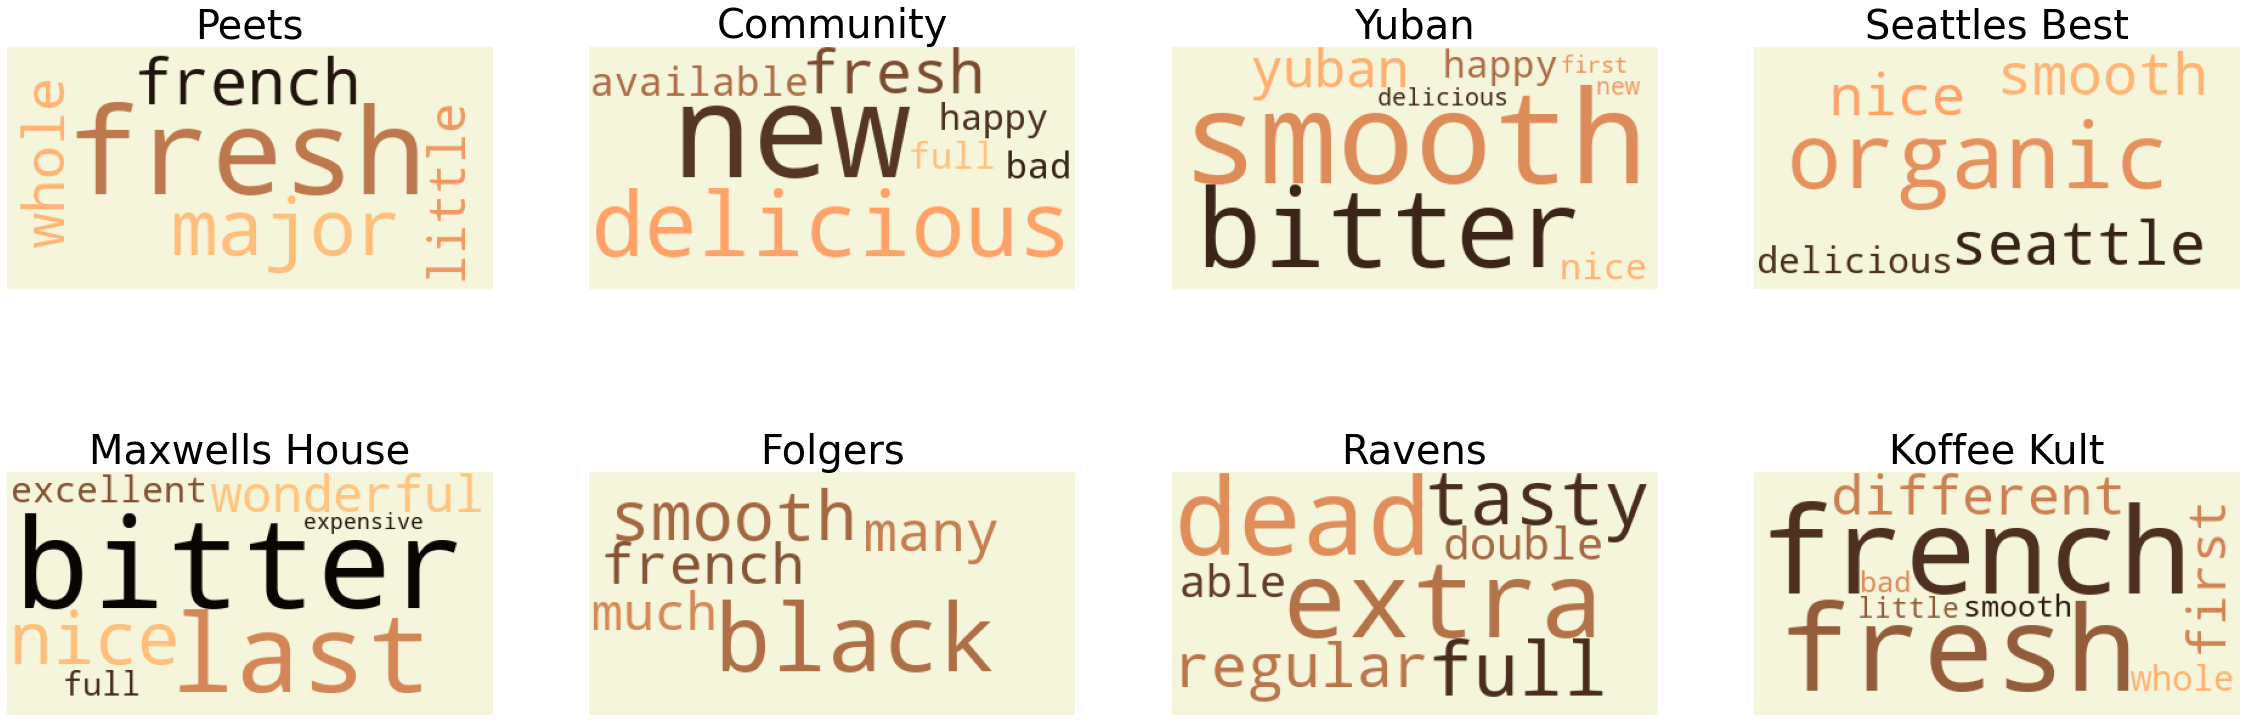

In [10]:
fig = plt.figure(figsize=(40,30))
for i in range(len(brand_names)):
    words_with_count = visualizing_data.words_with_count(unique_words, all_data, brand_names )
    string_of_unique_words = visualizing_data.string_for_wordle(words_with_count, brand_names[i])
    cloud = visualizing_data.create_word_cloud(string_of_unique_words, brand_names[i])
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(cloud)
    ax.axis('off')
    ax.set_title(brand_names[i],size=40)

These results answer our question as we wanted to show what flavor profiles make each coffee unique and these plots clearly do that. From these results, we see that Seattle’s Best coffee is organic and smooth, characteristics that lots of coffee drinkers believe are unique to Seattle's Best. These might be the features that interest someone looking to purchase coffee.

## Conclusion

As explained above in our results, a reader will see what each of the above coffees is specifically known for based on the content of the word cloud. Ideally, the reader will feel more informed about what kind of coffee is right for them and will feel more confident about purchasing any one of the coffees that is shown.
While our project seems very harmless on a surface level, as we only looked at reviews for coffee, how we were able to access and scrape those reviews can be concerning. The adaptability of our code to be applied to any website creates the potential to do harm. The possibility for our code to be used on any website presents ethical concerns surrounding privacy and copyright. For example, our web-scraping process might be used to scrape online chats without the consent of the people involved. Our code could also be used to steal data protected by a paywall to then be distributed to others.

We learned a lot through the process of this project. Learning how to scrape the reviews was a significant hurdle we had to cross and the most frustrating part of our project. We had to think of various ways to get past the Amazon API in order to collect the HTML pages that we wanted to get data from. Considering that each brand of coffee that we chose had 30-50 urls from where we had to scrape data, collecting the data took a significant amount of time. This grew increasingly frustrating as we ran more tests and caused Amazon to become more suspicious. Several times, our code wasn’t able to get useful data from the Amazon site before running into a recursion depth excess error.  We mitigated this frustration by storing our data in .csv files so that we only had to go through the web-scraping process once.

Additionally, this was the first time we had to decide how to structure our code. We had to organize our functions  in a way that made it easy for us to navigate and readable to others. With this in mind, we divided our code into four main Python files: Data scraping, processing, visualization, and file loading. This organization makes it clear how our project consists of these different tasks that work towards our goal.
We also learned more about visualization throughout this project. We iterated multiple times on what kind of visual would be best to display our results. At first, we tried using layered bar graphs to show how much of each word is used for each brand. However, this representation ended up being very confusing to look at and so we decided to switch to word clouds as we thought they conveyed our results in a much more obvious and easy to understand format.

We think this project has the potential to be improved by refining the adjective filtration process. Looking at our resulting word clouds, there are few words that are not particularly useful. For example, Maxwell's House coffee has unique descriptors like nice and wonderful which are vague in that they are generally synonymous with the word “good”. Finding a way to filter out these words that don’t provide valuable information about the coffee would be a very suitable next step in this project. In this project, we chose to limit our data to examining dark roast ground coffee across different brands. An expansion of this project might be to look at medium and light roast coffee and see how users’ reception of those coffee flavors differ. This may be another way to help beginner coffee drinkers understand what kind of coffee they will enjoy when they’re deciding what to buy. Additionally doing our project on a larger scale with 20-30 coffee brands instead of just 8 would be interesting and would help us get a larger amount of information.